In [73]:
from control import ss, tf, step_response, input_output_response
from matplotlib.pyplot import plot, xlabel, ylabel, title, legend, grid
from numpy import zeros, ones, linspace, array

from sympy import symbols, expand, simplify, exp
from sympy.abc import s, t, lamda, theta
from sympy.matrices import Matrix

# Problem 18.3

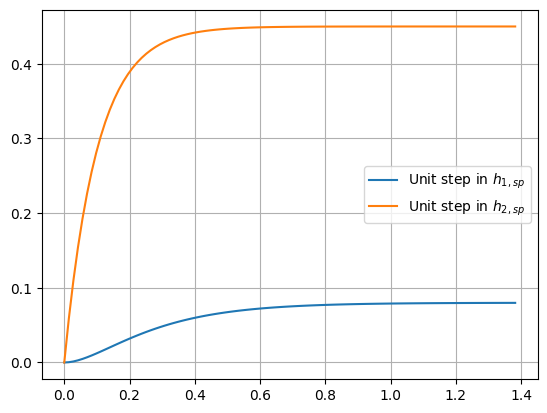

In [63]:
h_1, h_2, A_1, A_2, R_1, R_2, h_1sp, h_2sp, k_c1, k_c2 = symbols("h_1, h_2, A_1, A_2, R_1, R_2, h_1sp, h_2sp, k_c1, k_c2")

F_in1 = k_c1 * (h_1sp - h_1)
F_in2 = k_c2 * (h_2sp - h_2)

f_1 = expand((F_in1 - h_1 / R_1) / A_1)
f_2 = expand((F_in2 + h_1 / R_1 - h_2 / R_2) / A_2)

A_sym = Matrix([
    [f_1.coeff(h_1), f_1.coeff(h_2)],
    [f_2.coeff(h_1), f_2.coeff(h_2)],
])

B_sym = Matrix([
    [f_1.coeff(h_1sp), f_1.coeff(h_2sp)],
    [f_2.coeff(h_1sp), f_2.coeff(h_2sp)],
])

c_sym = Matrix([[0, 1 / R_2]])

d = 0

sub_dict = {A_1: 1, A_2: 0.5, R_1: 1, R_2: 2, k_c1: 4, k_c2: 4.5}

A = array(A_sym.subs(sub_dict), dtype=float)
B = array(B_sym.subs(sub_dict), dtype=float)
c = array(c_sym.subs(sub_dict), dtype=float)

sys = ss(A, B, c, d)
t, y = step_response(sys)

plot(t, y[0, 0], label=r"Unit step in $h_{1,sp}$")
plot(t, y[0, 1], label=r"Unit step in $h_{2,sp}$")
grid()
legend(loc="right")

# Problem 19.1

## Part A

In [70]:
k, tau_0, tau_1, tau_2, tau_3 = symbols("k, tau_0, tau_1, tau_2, tau_3")

Gpp = 1
Gpm = k * (1 + tau_0 * s) / (1 + tau_1 * s) / (1 + tau_2 * s) / (1 + tau_3 * s)
r = 2

G_c = simplify(1 / ((lamda * s + 1)**r - Gpp) / Gpm)

G_c

(s*tau_1 + 1)*(s*tau_2 + 1)*(s*tau_3 + 1)/(k*(s*tau_0 + 1)*((lamda*s + 1)**2 - 1))

## Part B

In [71]:
Gpp = (1 - tau_0 * s) / (1 + tau_0 * s)

G_c = simplify(1 / ((lamda * s + 1)**r - Gpp) / Gpm)

G_c

(s*tau_1 + 1)*(s*tau_2 + 1)*(s*tau_3 + 1)/(k*(s*tau_0 + (lamda*s + 1)**2*(s*tau_0 + 1) - 1))

## Part C

In [76]:
Gpp = exp(-theta * s)
Gpm = k / (1 + tau_1 * s) / (1 + tau_2 * s)
r = 2
G_c = simplify(1 / ((lamda * s + 1)**r - Gpp) / Gpm)

G_c

(s*tau_1 + 1)*(s*tau_2 + 1)*exp(s*theta)/(k*((lamda*s + 1)**2*exp(s*theta) - 1))

### Pade

In [77]:
Gpp = 1
pade_1 = (1 - theta * s / 2) / (1 + theta * s / 2)
Gpm = k / (1 + tau_1 * s) / (1 + tau_2 * s) * pade_1
r = 2
G_c = simplify(1 / ((lamda * s + 1)**r - Gpp) / Gpm)

G_c

-(s*tau_1 + 1)*(s*tau_2 + 1)*(s*theta + 2)/(k*(s*theta - 2)*((lamda*s + 1)**2 - 1))